In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("/home/rguktrkvalley/Downloads/Algerian_forest_fires_dataset.csv")

In [4]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [7]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [8]:
df=df.drop(122).reset_index(drop=True)
df=df.drop(123).reset_index(drop=True)

In [9]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [10]:
df.loc[:122,"region"]=0
df.loc[122:,"region"]=1
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
241,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
242,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
243,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [11]:
df[["region"]]=df[["region"]].astype(int)

In [12]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [13]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
region         0
dtype: int64

In [14]:
df.dropna().reset_index(drop=True)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [15]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [16]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
region         0
dtype: int64

In [17]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [18]:
df=df.drop(122).reset_index(drop=True)

In [19]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [20]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [21]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


In [23]:
df[["month","day","year","Temperature","RH","Ws"]]=df[["month","day","year","Temperature","RH","Ws"]].astype(int)

In [ ]:
df.info()

In [24]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64

In [25]:
objects=[features for features in df.columns if df[features].dtypes=="O"]

In [26]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [27]:
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

ValueError: could not convert string to float: '14.6 9'

In [30]:
for i in objects:
    if i != 'Classes':
        df[i] = df[i].astype(str).str.replace(r'[^\d\.\-]', '', regex=True)  # keep only digits, dots, minus
        df[i] = pd.to_numeric(df[i], errors='coerce')  # convert safely


In [31]:
for i in objects:
    if i != 'Classes':
        try:
            df[i] = df[i].astype(float)
        except ValueError:
            print(f"Conversion failed for column: {i}")
            print(df[i][df[i].str.contains(' ', na=False)].head())


In [32]:
for i in objects:
    if i != 'Classes':
        df[i] = df[i].astype(str).str.replace(r'\s+', '', regex=True)  # remove spaces
        df[i] = df[i].astype(float)


In [33]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
region           int64
dtype: object

In [34]:
df.to_csv("algerian.csv",index=False)

Exploratory data analysis

In [35]:
 df1=df.drop(["day","month","year"],axis=1)

In [36]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [37]:
df1.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            1
Classes        1
region         0
dtype: int64

In [38]:
df1[df1.isnull().any(axis=1)]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,NaN,NaN,1


In [39]:
df1=df1.drop(165).reset_index(drop=True)

In [40]:
df1.loc[165]

Temperature         34
RH                  45
Ws                  17
Rain               0.0
FFMC              90.5
DMC               18.0
DC                24.1
ISI               10.9
BUI               17.7
FWI               14.1
Classes        fire   
region               1
Name: 165, dtype: object

In [41]:
df1["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [42]:
df1["Classes"]=np.where(df1["Classes"].str.contains("not fire"),0,1)

In [43]:
df1["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [44]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [45]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [46]:
percentage=df1["Classes"].value_counts(normalize=True)*100

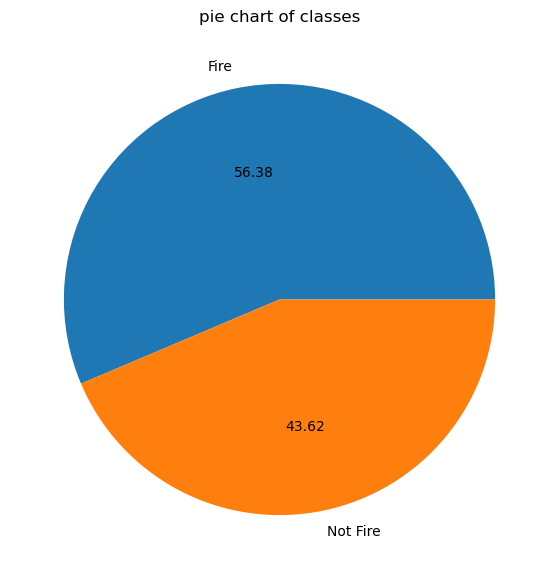

In [47]:
classs=["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classs,autopct="%0.2f")
plt.title("pie chart of classes")
plt.show()

In [48]:
df1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [49]:
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),"not fire","fire")

In [50]:
dftemp=df.loc[df["region"]==0]
sns.countplot(x="month",hue="Classes",data=dftemp)
plt.xlabel("months")
plt.ylabel("no of fires")
plt.title("fire analysis of sidi bel regions",weight="bold")

Text(0.5, 1.0, 'fire analysis of sidi bel regions')

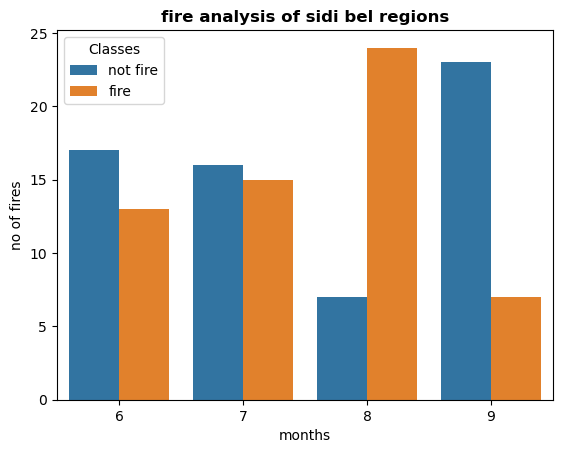

In [51]:
plt.show()

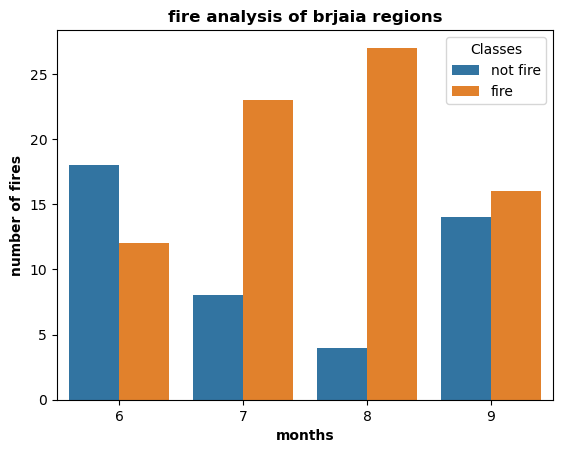

In [52]:
dftemp=df.loc[df["region"]==1]
sns.countplot(x="month",hue="Classes",data=dftemp)
plt.xlabel("months",weight="bold")
plt.ylabel("number of fires",weight="bold")
plt.title("fire analysis of brjaia regions",weight="bold")
plt.show()

#model training Using Lasso Regression

In [53]:
df1

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [54]:
df1.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [55]:
x=df1.drop("FWI",axis=1)

In [56]:
y=df1["FWI"]

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [58]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((182, 11), (182,), (61, 11), (61,))

In [59]:
#feature selection based on correaltion
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.672297,-0.384723,-0.316109,0.652761,0.476461,0.358251,0.630349,0.447645,0.523316,0.271306
RH,-0.672297,1.000000,0.301471,0.200457,-0.625479,-0.401357,-0.209302,-0.699150,-0.343166,-0.426875,-0.404342
Ws,-0.384723,0.301471,1.000000,0.205017,-0.230176,-0.059600,0.025985,-0.068626,-0.025892,-0.080234,-0.199526
Rain,-0.316109,0.200457,0.205017,1.000000,-0.535490,-0.282677,-0.302499,-0.350268,-0.295901,-0.378917,-0.039462
FFMC,0.652761,-0.625479,-0.230176,-0.535490,1.000000,0.607316,0.518267,0.746328,0.599591,0.772911,0.203425
DMC,0.476461,-0.401357,-0.059600,-0.282677,0.607316,1.000000,0.879892,0.668238,0.982962,0.599141,0.191947
DC,0.358251,-0.209302,0.025985,-0.302499,0.518267,0.879892,1.000000,0.499777,0.940879,0.539576,-0.085104
ISI,0.630349,-0.699150,-0.068626,-0.350268,0.746328,0.668238,0.499777,1.000000,0.634988,0.735699,0.270196
BUI,0.447645,-0.343166,-0.025892,-0.295901,0.599591,0.982962,0.940879,0.634988,1.000000,0.608928,0.087185
Classes,0.523316,-0.426875,-0.080234,-0.378917,0.772911,0.599141,0.539576,0.735699,0.608928,1.000000,0.171467


In [60]:
#check for multi collinearity
plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True)

<Axes: >

In [61]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [62]:
#threshold-domain expertise
corr_features=correlation(x_train,0.85)

In [63]:
corr_features

{'BUI', 'DC'}

In [64]:
#drop features when correaltion is more than 0.85
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

Feature scaling or standardization

In [65]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [66]:
x_train_scaled

array([[ 0.47178813, -0.05549353, -0.93418191, ..., -0.82759872,
        -1.15470054, -1.04496604],
       [-0.35649585,  1.0667089 ,  0.82223449, ..., -0.0549331 ,
         0.8660254 , -1.04496604],
       [ 1.30007211, -0.45156497, -0.23161535, ...,  0.78797484,
         0.8660254 ,  0.9569689 ],
       ...,
       [ 1.30007211, -0.58358878, -0.58289863, ...,  0.71773251,
         0.8660254 ,  0.9569689 ],
       [-0.63259051,  0.73664936, -0.58289863, ..., -0.66369995,
        -1.15470054,  0.9569689 ],
       [-0.08040119,  0.86867318, -0.58289863, ...,  0.06213744,
         0.8660254 , -1.04496604]])

In [67]:
%matplotlib notebook


In [68]:
#box plots to understand the effect %matplotlib inline
import matplotlib.pyplot as plt 
%matplotlib inline

In [69]:
sns.boxplot(data=x_train)
plt.title("x_train before scaling")


Text(0.5, 1.0, 'x_train before scaling')

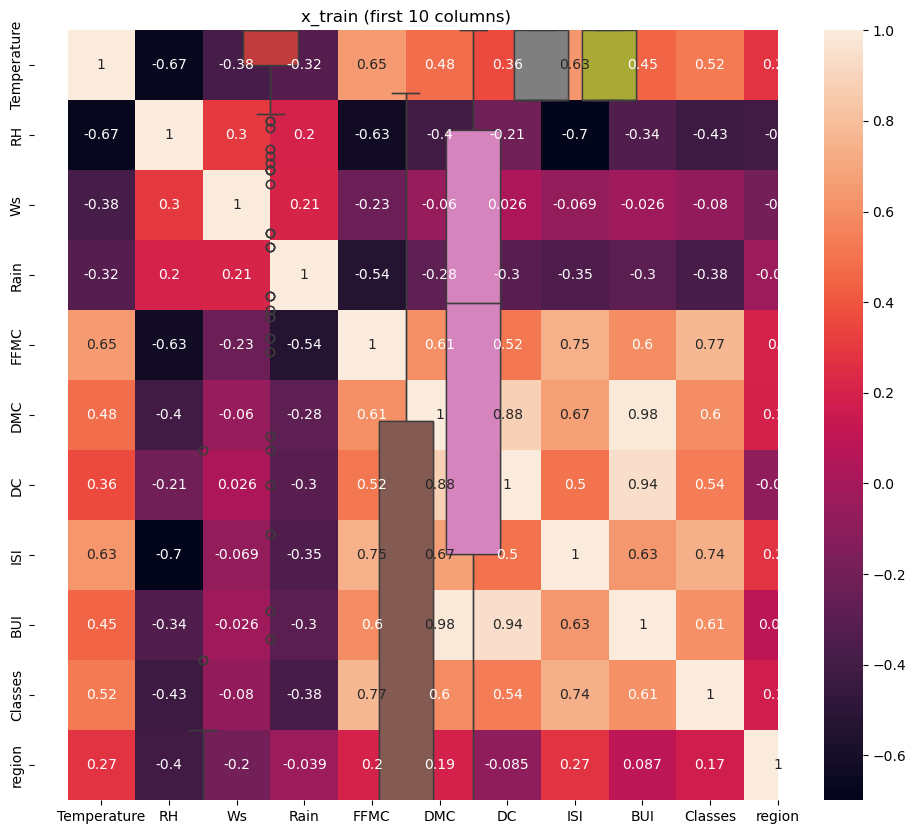

In [70]:
sns.boxplot(data=x_train.iloc[:, :10])  # first 10 columns only
plt.title("x_train (first 10 columns)")

plt.show()


In [71]:
type(x_train)

pandas.core.frame.DataFrame

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

mean absolute error 34.69322491264806
r2_Score -34.752677786113935


/home/rguktrkvalley/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


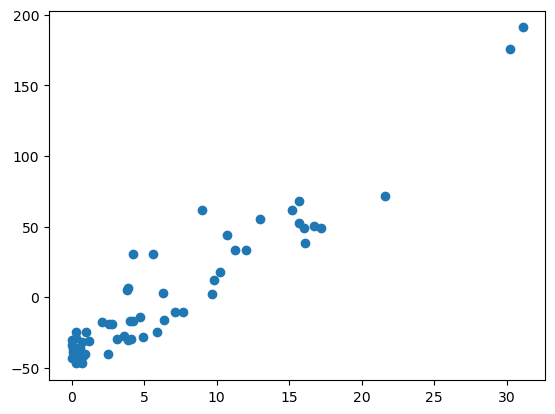

In [73]:
model=LinearRegression()
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean absolute error",mae)
print("r2_Score",score)
plt.scatter(y_test,y_pred)
plt.show()

Mae 0.8053513476816186
score 0.9765372092975944


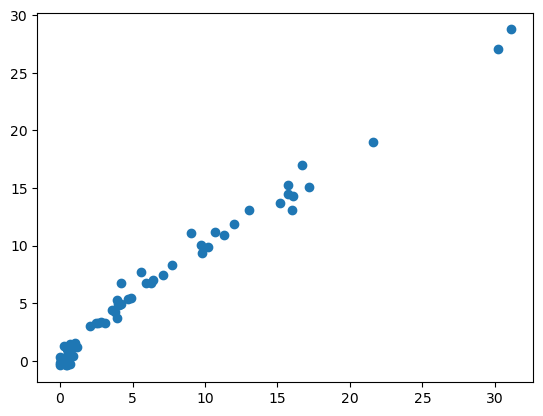

In [74]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mae",mae)
print("score",score)
plt.scatter(y_test,y_pred)
plt.show()


Mae 0.805351347681621
score 0.9765372092976456


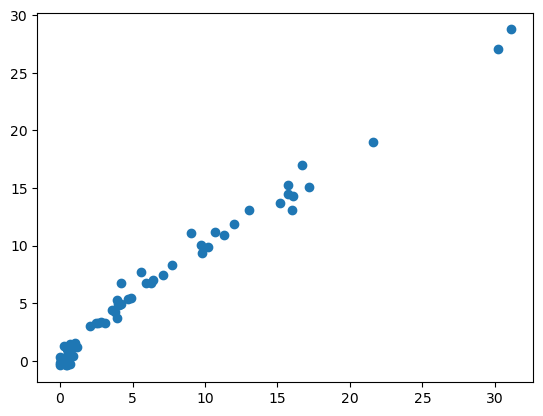

In [75]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,r2_score
ridgecv=RidgeCV()
ridgecv.fit(x_train_scaled,y_train)
y_pred=ridgecv.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mae",mae)
print("score",score)
plt.scatter(y_test,y_pred)
plt.show()

Mae 1.3378680051403309
score 0.9338401612055993


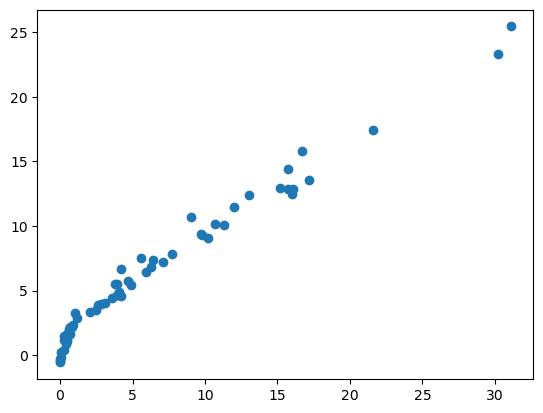

In [76]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mae",mae)
print("score",score)
plt.scatter(y_test,y_pred)
plt.show()

Mae 0.7883505890223402
score 0.9765542813114226


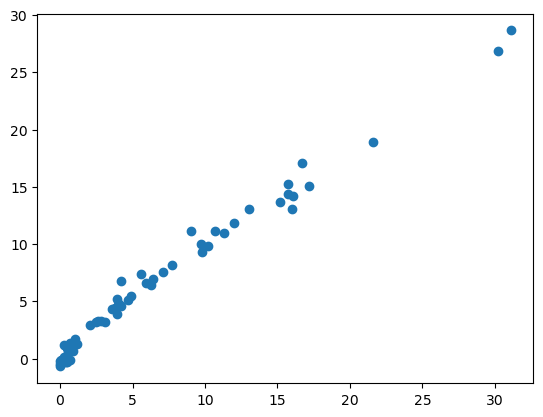

In [77]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error,r2_score
lassocv=LassoCV()
lassocv.fit(x_train_scaled,y_train)
y_pred=lassocv.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mae",mae)
print("score",score)
plt.scatter(y_test,y_pred)
plt.show()

Mae 2.0468155295557753
score 0.8546878591439864


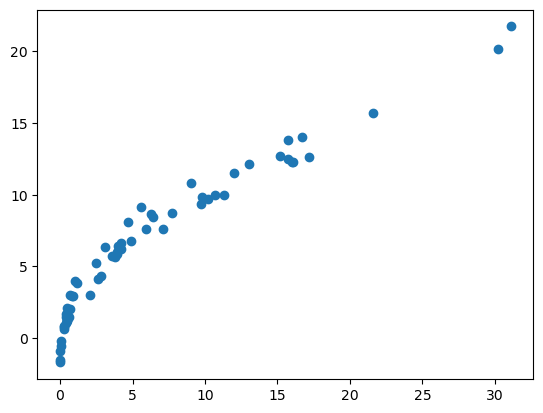

In [78]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
elas=ElasticNet()
elas.fit(x_train_scaled,y_train)
y_pred=elas.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mae",mae)
print("score",score)
plt.scatter(y_test,y_pred)
plt.show()

Mae 0.8345418500807564
score 0.974881732507928


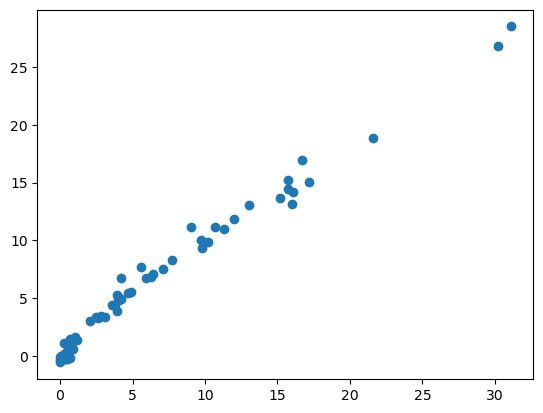

In [79]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error,r2_score
elascv=ElasticNetCV()
elascv.fit(x_train_scaled,y_train)
y_pred=elascv.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mae",mae)
print("score",score)
plt.scatter(y_test,y_pred)
plt.show()

In [81]:
import pickle 
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(lassocv,open("lassocvv.pkl","wb"))